<a href="https://colab.research.google.com/github/ShripadJagtap/LGMVIP-DataScience/blob/main/LGMVIP_TASK7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: SHRIPAD JAGTAP**


**DATA SCIENCE INTERN AT LETSGROWMORE LGMVIPDECEMBER**



**ADVANCED LEVEL TASK 1 :  Develop A Neural Network That Can Read Handwriting**



> 



***STEP 1: IMPORT ALL THE REQUIRED LIBRARIES AND LOAD THE DATASETS***

In [1]:
#Import MNIST dataset from Keras
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#TO VISULAIZE THE DIGITS IN THE DATASET
import matplotlib.pyplot as plt
%matplotlib inline

0


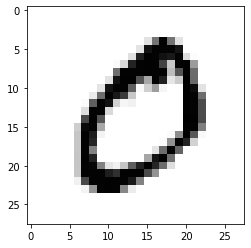

In [4]:
image_index= 1
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [5]:
#Verify the sizes of the images
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
print(y_train[:image_index +2])

[5 0 4]


In [7]:
#CLEANING THE DATA
image_rows,image_cols =28,28  #image dimensions

x_train =x_train.reshape(x_train.shape[0],image_rows,image_cols,1)
x_test =x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)

In [8]:
# normalize the image data by dividing each pixel value by 255 
x_train.astype('float32')/ 255
x_test.astype('float32')/ 255

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [9]:
#convert the dependent variable in the form of integers to a binary class matrix. 

!pip install keras.utils 

import tensorflow
from tensorflow.keras.utils import to_categorical
import keras
import keras.utils
num_classes =10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=f07d9fd69c73a6dcd32e39c7562ee5172c6de1c0523aec34f8dceb6f647409d2
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
#DESIGNING A MODEL
#to add a concolutipn layer to take input images
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()  #creates an empty model object
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(image_rows, image_cols,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))   #to overcome the overfitting problems
model.add(layers.Flatten())       #to convert previous hidden layer in 1D array
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

***STEP 2: COMPILE AND TRAIN THE MODEL***

In [12]:
model.compile(loss="categorical_crossentropy", optimizer= "adam",metrics=["accuracy"])

In [13]:
batch_size =32
epochs=10
model.fit(x_train,y_train, batch_size=batch_size, epochs= epochs, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 61s 36ms/step - loss: 0.6726 - accuracy: 0.8089 - val_loss: 0.1173 - val_accuracy: 0.9657
Epoch 2/10
1688/1688 [==============================] - 60s 35ms/step - loss: 0.2107 - accuracy: 0.9391 - val_loss: 0.1039 - val_accuracy: 0.9720
Epoch 3/10
1688/1688 [==============================] - 60s 35ms/step - loss: 0.1628 - accuracy: 0.9541 - val_loss: 0.0732 - val_accuracy: 0.9787
Epoch 4/10
1688/1688 [==============================] - 58s 35ms/step - loss: 0.1481 - accuracy: 0.9583 - val_loss: 0.0780 - val_accuracy: 0.9810
Epoch 5/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.1298 - accuracy: 0.9641 - val_loss: 0.0790 - val_accuracy: 0.9787
Epoch 6/10
1688/1688 [==============================] - 59s 35ms/step - loss: 0.1232 - accuracy: 0.9654 - val_loss: 0.0609 - val_accuracy: 0.9823
Epoch 7/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.1182 - accuracy: 0.9671 - val_loss: 0.0629 -

In [14]:
score =model.evaluate(x_test, y_test, verbose=0)
model.save("test_model")
print("Test Loss :", score[0])
print("Test Accuracy :", score[1])

INFO:tensorflow:Assets written to: test_model/assets
Test Loss : 0.0671253502368927
Test Accuracy : 0.98089998960495


***STEP 3: TESTING THE MODEL***

In [15]:
import matplotlib.pyplot as plt
import numpy as np

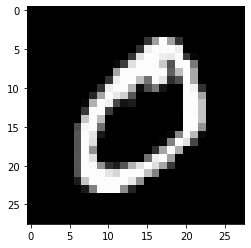

In [16]:
image = x_train[1]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [20]:
# reshape the image
image = image.reshape(-1, image_rows, image_cols, 1)

In [21]:
# predict digit
prediction =model.predict(image)
np.argmax(prediction)


0